In [1]:
import numpy as np
import pandas as pd
import os
from multiprocessing import Pool
from tqdm import tqdm

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

pd.set_option('expand_frame_repr', True) 
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option('display.width', 180) 

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset

In [3]:
from data_api import DataFeeder, DataAPI
from factor_base import FactorBase

# Instantiate the data interface
d = DataFeeder() 
api = DataAPI()

函数: read_stk_data 运行了 0.0299秒
函数: read_stk_data 运行了 3.3551秒
函数: read_stk_data 运行了 0.0043秒
函数: read_stk_data 运行了 3.1104秒


In [4]:
data = d.read_stk_data('processed_stock_trade_data', dtype='basic')


函数: read_stk_data 运行了 6.4808秒


,date,stock_code,open,high,low,close,volume,total_turnover,prev_close,limit_up,...,vwap_1400,vwap_1430,vwap_1500,total_cap,total_a_cap,circulation_cap,free_circulation_cap,total_a,circulation_a,free_circulation
0,2010-01-04,000001.SZ,24.52,24.58,23.68,23.71,24192276.0,5.802495e+08,24.37,26.81,...,23.870653,23.871627,23.740317,7.362983e+10,7.362983e+10,6.933075e+10,6.128930e+10,3.105434e+09,2.924114e+09,2.584956e+09
1,2010-01-04,000002.SZ,10.85,10.87,10.60,10.60,96983253.0,1.034345e+09,10.81,11.89,...,10.626122,10.647123,10.612672,1.165492e+11,1.026107e+11,1.023546e+11,8.519220e+10,9.680255e+09,9.656095e+09,8.037000e+09
2,2010-01-04,000004.SZ,10.00,10.00,10.00,10.00,0.0,0.000000e+00,10.00,0.00,...,NaN,NaN,NaN,8.397668e+08,8.397668e+08,7.030741e+08,6.081627e+08,8.397668e+07,7.030741e+07,6.081627e+07
3,2010-01-04,000005.SZ,6.01,6.05,5.91,5.99,22358222.0,1.334784e+08,6.02,6.62,...,5.972632,6.021867,5.970959,5.476858e+09,5.476858e+09,5.473321e+09,4.170161e+09,9.143336e+08,9.137430e+08,6.961872e+08
4,2010-01-04,000006.SZ,11.33,11.35,11.11,11.12,6299805.0,7.054856e+07,11.33,12.46,...,11.168792,11.185889,11.141738,5.639878e+09,5.639878e+09,5.471370e+09,4.176342e+09,5.071833e+08,4.920297e+08,3.755703e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10978900,2023-12-01,688799.SH,44.80,45.19,44.50,44.74,689558.0,3.091075e+07,45.05,54.06,...,NaN,NaN,NaN,4.196612e+09,4.196612e+09,2.527273e+09,1.829329e+09,9.380000e+07,5.648800e+07,4.088800e+07
10978901,2023-12-01,688800.SH,43.75,43.93,43.04,43.53,1081538.0,4.694179e+07,43.75,52.50,...,NaN,NaN,NaN,6.896017e+09,6.896017e+09,4.639822e+09,4.111455e+09,1.584199e+08,1.065891e+08,9.445107e+07
10978902,2023-12-01,688819.SH,29.60,29.60,29.06,29.27,1905987.0,5.576892e+07,29.60,35.52,...,NaN,NaN,NaN,2.845337e+10,2.845337e+10,3.831443e+09,3.630929e+09,9.721000e+08,1.309000e+08,1.240495e+08
10978903,2023-12-01,688981.SH,53.60,54.57,52.90,54.15,17865482.0,9.602448e+08,53.70,64.44,...,NaN,NaN,NaN,4.303050e+11,1.068709e+11,1.068709e+11,1.029466e+11,1.973609e+09,1.973609e+09,1.901138e+09


In [6]:
data_000001 = data[data.stock_code == "000001.SZ"]
data_000001.set_index("date",inplace=True)
data_000001

,stock_code,open,high,low,close,volume,total_turnover,prev_close,limit_up,limit_down,...,vwap_1400,vwap_1430,vwap_1500,total_cap,total_a_cap,circulation_cap,free_circulation_cap,total_a,circulation_a,free_circulation
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,000001.SZ,24.52,24.58,23.68,23.71,24192276.0,5.802495e+08,24.37,26.81,21.93,...,23.870653,23.871627,23.740317,7.362983e+10,7.362983e+10,6.933075e+10,6.128930e+10,3.105434e+09,2.924114e+09,2.584956e+09
2010-01-05,000001.SZ,23.75,23.90,22.75,23.30,55649982.0,1.293477e+09,23.71,26.08,21.34,...,23.266947,23.252160,23.291249,7.235661e+10,7.235661e+10,6.813186e+10,6.022946e+10,3.105434e+09,2.924114e+09,2.584956e+09
2010-01-06,000001.SZ,23.25,23.25,22.72,22.90,41214313.0,9.444537e+08,23.30,25.63,20.97,...,22.922567,22.890978,22.858380,7.111443e+10,7.111443e+10,6.696222e+10,5.919548e+10,3.105434e+09,2.924114e+09,2.584956e+09
2010-01-07,000001.SZ,22.90,23.05,22.40,22.65,35533685.0,8.041663e+08,22.90,25.19,20.61,...,22.700327,22.557737,22.501814,7.033807e+10,7.033807e+10,6.623119e+10,5.854924e+10,3.105434e+09,2.924114e+09,2.584956e+09
2010-01-08,000001.SZ,22.50,22.75,22.35,22.60,28854306.0,6.506674e+08,22.65,24.92,20.38,...,22.444775,22.600118,22.566679,7.018280e+10,7.018280e+10,6.608498e+10,5.842000e+10,3.105434e+09,2.924114e+09,2.584956e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,000001.SZ,10.09,10.09,9.97,10.01,83618785.0,8.362684e+08,10.10,11.11,9.09,...,10.015698,10.001426,10.014567,1.942532e+11,1.942532e+11,1.942495e+11,8.168588e+10,1.940592e+10,1.940555e+10,8.160428e+09
2023-11-28,000001.SZ,9.99,10.02,9.95,9.95,78617469.0,7.844058e+08,10.01,11.01,9.01,...,9.966221,9.968557,9.960475,1.930889e+11,1.930889e+11,1.930852e+11,8.119625e+10,1.940592e+10,1.940555e+10,8.160428e+09
2023-11-29,000001.SZ,9.95,9.97,9.70,9.72,146759662.0,1.438320e+09,9.95,10.95,8.96,...,NaN,NaN,NaN,1.886255e+11,1.886255e+11,1.886219e+11,7.931936e+10,1.940592e+10,1.940555e+10,8.160428e+09


In [9]:
str(data_000001.index[-1])[:10]

'2023-12-01 00:00:00'

In [5]:
data = data[data.date >= "2016-01-01"][['date', 'stock_code', 'open', 'high', 'low', 'close', 'volume', 'total_turnover']]
data['vwap'] = data.total_turnover / data.volume
data = data[['date', 'stock_code', 'open', 'high', 'low', 'close', 'vwap']]
data

,date,stock_code,open,high,low,close,vwap
3452713,2016-01-04,000001.SZ,12.00,12.03,11.23,11.33,11.719231
3452714,2016-01-04,000002.SZ,24.43,24.43,24.43,24.43,NaN
3452715,2016-01-04,000004.SZ,45.90,46.60,41.31,41.31,42.776439
3452716,2016-01-04,000005.SZ,10.00,10.00,9.04,9.04,9.345546
3452717,2016-01-04,000006.SZ,11.46,11.52,10.36,10.38,10.935658
...,...,...,...,...,...,...,...
10973818,2023-11-30,688799.SH,44.70,45.08,44.30,45.05,44.745058
10973819,2023-11-30,688800.SH,44.25,44.70,42.90,43.75,43.591779
10973820,2023-11-30,688819.SH,29.65,29.99,29.49,29.60,29.639942
10973821,2023-11-30,688981.SH,53.76,54.19,53.45,53.70,53.804662


In [24]:
data_fill = data[['date', 'open', 'high', 'low', 'close', 'vwap']].groupby("date").mean()
# data_fill.to_csv("/mnt/research/data/temp/zhangsurui/E2E_NN/Round1/data_fill.csv")
data_fill

,open,high,low,close,vwap
date,,,,,
2016-01-04,24.711699,24.946224,22.672667,22.734808,23.756566
2016-01-05,21.510895,23.056573,21.175442,22.284254,22.051227
2016-01-06,22.419746,23.139384,21.976955,22.940820,22.534881
2016-01-07,22.524373,22.622723,21.003058,21.044231,21.516969
2016-01-08,21.531671,22.029587,19.880486,21.202425,20.959289
...,...,...,...,...,...
2023-11-24,21.646700,21.841053,21.125550,21.332636,21.408189
2023-11-27,21.296641,21.714217,20.986663,21.377614,21.343511
2023-11-28,21.357406,21.816126,21.103628,21.568915,21.503553


In [25]:
df_check = pd.DataFrame(index=data_fill.index, columns=data_fill.columns, dtype=float)
df_check[:] = np.nan
df_check

,open,high,low,close,vwap
date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-11-24,NaN,NaN,NaN,NaN,NaN
2023-11-27,NaN,NaN,NaN,NaN,NaN
2023-11-28,NaN,NaN,NaN,NaN,NaN


In [26]:
len(data.stock_code.unique())

5229

In [9]:
def classify_y(y):
    if y >= 0.001:
        return 1
    else:
        return 0

def process_rolling_window(window):
    if window.isnull().any().any():  # Check if any NaN in the window
        return None
    else:
        return (window.iloc[:-1,:5].to_numpy(), np.array([[classify_y(window.iloc[-1,5])]]))  # Convert DataFrame to numpy array

window_size = 10
stock_pool = data.stock_code.unique()[:10]
train_sample_list = []
test_sample_list = []
for stock in tqdm(stock_pool):
    data_train = pd.read_feather("/mnt/research/data/temp/zhangsurui/E2E_NN/Round1/train/"+stock[:-3]+"_train.feather")
    data_train.set_index('date',inplace=True)
    train_list = [process_rolling_window(data_train.iloc[i:i+window_size+1]) for i in range(len(data_train) - window_size)]
    train_list = [res for res in train_list if res is not None]
    train_sample_list.extend(train_list)
    
    data_test = pd.read_feather("/mnt/research/data/temp/zhangsurui/E2E_NN/Round1/test/"+stock[:-3]+"_test.feather")
    data_test.set_index('date',inplace=True)
    test_list = [process_rolling_window(data_test.iloc[i:i+window_size+1]) for i in range(len(data_test) - window_size)]
    test_list = [res for res in test_list if res is not None]
    test_sample_list.extend(test_list)

100%|██████████| 10/10 [00:06<00:00,  1.61it/s]


In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_loader = DataLoader(train_sample_list, batch_size=1, shuffle=False)
test_loader = DataLoader(test_sample_list, batch_size=1, shuffle=False)

for features, labels in train_loader:
    features.shape
    labels.shape
    break

torch.Size([1, 10, 5])

torch.Size([1, 1, 1])

In [12]:
class GRUNet(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=1, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return torch.sigmoid(out)
    
model = GRUNet(input_size=5, hidden_size=50, num_layers=2, output_size=1)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
model.to(device)
train_losses = []
train_acc = []
test_losses = []
test_acc = []

for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    train_correct = 0
    total_train = 0

    for seq, labels in train_loader:
        seq, labels = seq.to(device), labels.to(device)
        optimizer.zero_grad()
        y_pred = model(seq.float())
        single_loss = criterion(y_pred.squeeze(), labels.float().squeeze())
        single_loss.backward()
        optimizer.step()
        
        total_train_loss += single_loss.item()
        predicted = (y_pred > 0.5).float()
        total_train += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        
    train_loss = total_train_loss / len(train_loader)
    train_accuracy = train_correct / total_train
    train_losses.append(train_loss)
    train_acc.append(train_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}')
    
    model.eval()
    total_test_loss = 0
    test_correct = 0
    total_test = 0

    for seq, labels in test_loader:
        seq, labels = seq.to(device), labels.to(device)
        y_pred = model(seq.float())
        single_loss = criterion(y_pred.squeeze(), labels.float().squeeze())
        
        total_test_loss += single_loss.item()
        predicted = (y_pred > 0.5).float()
        total_test += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        
    test_loss = total_test_loss / len(test_loader)
    test_accuracy = test_correct / total_test
    test_losses.append(test_loss)
    test_acc.append(test_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.4f}')

print('Finished Training')


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 1/20, Loss: 0.6949, Accuracy: 0.5330


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 1/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 2/20, Loss: 0.6916, Accuracy: 0.5303


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 2/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 3/20, Loss: 0.6913, Accuracy: 0.5349


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 3/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 4/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 4/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 5/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 5/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 6/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 6/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 7/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 7/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 8/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 8/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 9/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 9/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 10/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 10/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 11/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 11/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 12/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 12/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 13/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 13/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 14/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 14/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 15/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 15/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 16/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 16/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 17/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 17/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 18/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 18/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 19/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 19/20, Loss: 0.6866, Accuracy: 0.5596


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 20/20, Loss: 0.6912, Accuracy: 0.5353


GRUNet(
  (gru): GRU(5, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

Epoch 20/20, Loss: 0.6866, Accuracy: 0.5596
Finished Training


<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Training and Validation Loss')

<Axes: >

Text(0.5, 1.0, 'Training and Validation Accuracy')

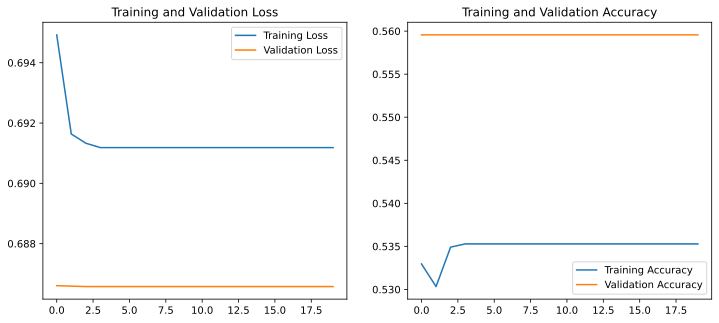

: 

In [13]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.show()

In [41]:
test_train = [np.array([np.random.rand(4), np.random.rand(4)]), np.array([np.random.rand(1)]), np.array([np.random.rand(4), np.random.rand(4)]), np.array([np.random.rand(1)]), np.array([np.random.rand(4), np.random.rand(4)]), np.array([np.random.rand(1)]), np.array([np.random.rand(4), np.random.rand(4)]), np.array([np.random.rand(1)])]
test_train_set = DataLoader(test_train, batch_size=1, shuffle=False)

In [18]:
def process_rolling_window(window):
    if window.isnull().any().any():  # Check if any NaN in the window
        return None
    else:
        return (window.iloc[:-1,:5].to_numpy(), np.array([[window.iloc[-1,5]]]))  # Convert DataFrame to numpy array

window_size = 10
stock_pool = data.stock_code.unique()
train_sample_list = []
test_sample_list = []
for stock in tqdm(stock_pool):
    data_this = data[data.stock_code == stock][['date', 'open', 'high', 'low', 'close', 'vwap']].copy()
    data_this.set_index('date',inplace=True)
    data_this = data_this.combine_first(df_check)
    data_this["return_5"] = (data_this.vwap.shift(-4) / data_this.vwap - 1).shift(-1)
    # data_this.dropna(axis=0,inplace=True)
    data_this.reset_index(drop=False, inplace=True)
    data_train = data_this[data_this.date <= "2022-01-01"]
    data_train.to_feather("/mnt/research/data/temp/zhangsurui/E2E_NN/Round1/train/"+stock[:-3]+"_train.feather")
    data_test = data_this[data_this.date >= "2021-12-20"]
    data_test.reset_index(drop=True, inplace=True)
    data_test.to_feather("/mnt/research/data/temp/zhangsurui/E2E_NN/Round1/test/"+stock[:-3]+"_test.feather")
    # data_this.to_csv("/mnt/research/data/temp/zhangsurui/E2E_NN/Round1/"+stock[:-3]+".csv")
    # data_train.set_index('date',inplace=True)
    # train_list = [process_rolling_window(df.iloc[i:i+window_size+1]) for i in range(len(df) - window_size)]
    # train_list = [res for res in train_list if res is not None]
    # train_sample_list.extend(train_list)
    # data_test.set_index('date',inplace=True)
    # test_list = [process_rolling_window(df.iloc[i:i+window_size+1]) for i in range(len(df) - window_size)]
    # test_list = [res for res in test_list if res is not None]
    # test_sample_list.extend(test_list)

  0%|          | 0/5253 [00:00<?, ?it/s]


KeyError: "['vwap'] not in index"

In [8]:
stock_pool = data.stock_code.unique()
stock_data_list = []
for stock in tqdm(stock_pool):
    data_this = data[data.stock_code == stock][['date', 'open', 'high', 'low', 'close', 'vwap']].copy()
    data_this.set_index('date',inplace=True)
    data_this = data_this.combine_first(df_check)
    data_this["return_5"] = (data_this.vwap.shift(-4) / data_this.vwap - 1).shift(-1)
    # data_this.dropna(axis=0,inplace=True)
    data_this.to_csv("/mnt/research/data/temp/zhangsurui/E2E_NN/Round1/"+stock[:-3]+".csv")
    stock_data_list.append(data_this)

100%|██████████| 5228/5228 [38:17<00:00,  2.28it/s]   
